In [3]:
# RNN remebers past inputs due to an internal memory which is useful for predicting stock prices ,generating text
#data whoose having autocorelation RNN can be used 
# in FFMLP diffrent weights accross each node
# in RNN same weights within the each layer 

In [4]:
#output is determined by the cuurent inputs and prevously recived inputs 
# does not use traditional backprpagation uses BPTT(back propagation through time )
# in backpropagation - model adjusts the parameter by calculating errors from the output to the input layer 
# in BPTT sums the error at the each time step as RNN 

In [5]:
#types of RNN 
#one to one-used in ML problems 
#one to many -generating image captions 
# many to one -sentiment classification (input is text output is a category)
#many to many -machine translation

In [6]:
#RNN used for speech and text analysis 

In [7]:
# Limitations of RNN
#gradient =slope of loss function
#1.)Vanishing Gradient Problem 
#2.)Exploding Gradient Problem

In [8]:
#the simple slution for that is LSTM (long short term memory NN)[series of tanh activation functions ] or reducting hiddden layers

In [9]:
from keras.models import Sequential 

In [10]:
from keras.layers import Dense,LSTM

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [12]:
data=pd.read_csv("/content/drive/MyDrive/datasets/Mastercard_stock.csv",index_col="Date")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0


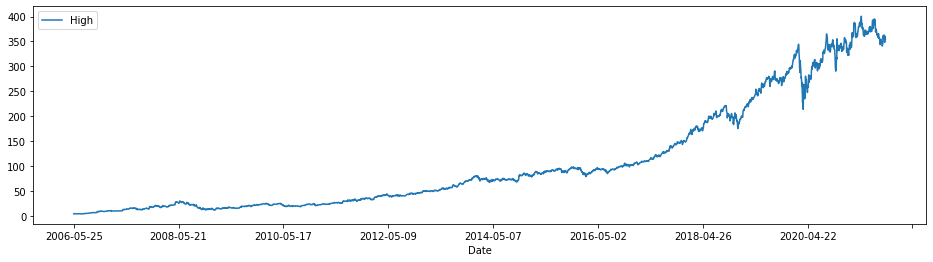

In [13]:
data["High"].plot(figsize=(16,4),legend=True)
plt.show()

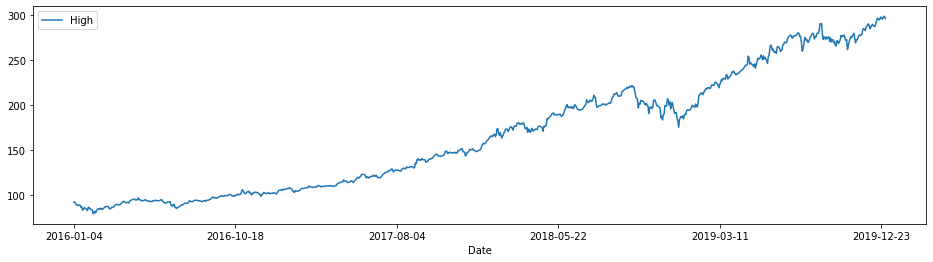

In [14]:
data.loc["2016":"2020","High"].plot(figsize=(16,4),legend=True)
plt.show() #this is the traning set 

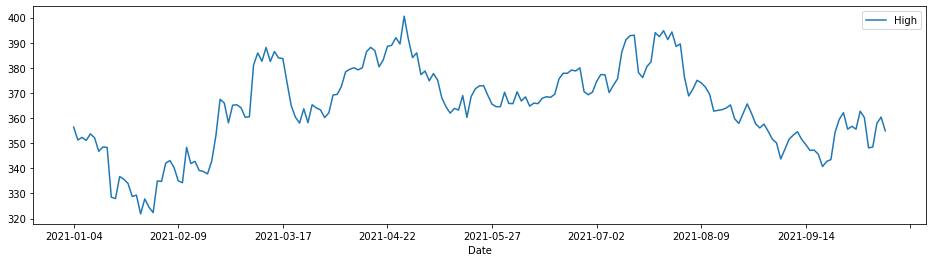

In [15]:
data.loc["2021":,"High"].plot(figsize=(16,4),legend=True)
plt.show() #testing set

In [16]:
train=data.loc["2016":"2020","High"].values

In [17]:
test=data.loc["2021":,"High"].values

In [18]:
sc=MinMaxScaler(feature_range=(0,1))
train.ndim

1

In [19]:
train.reshape(1006,1) # convert to 2D

array([[ 92.14629264],
       [ 92.37765141],
       [ 91.1718942 ],
       ...,
       [298.44908132],
       [297.9740019 ],
       [295.87567648]])

In [20]:
train.reshape(-1,1)

array([[ 92.14629264],
       [ 92.37765141],
       [ 91.1718942 ],
       ...,
       [298.44908132],
       [297.9740019 ],
       [295.87567648]])

In [21]:
traning_set=train.reshape(-1,1)

In [22]:
traning_set_scaled=sc.fit_transform(traning_set)

In [23]:
traning_set_scaled

array([[0.06010642],
       [0.06116047],
       [0.05566717],
       ...,
       [1.        ],
       [0.99783559],
       [0.98827584]])

In [24]:
# we have to make x and y using same set scaled assume first 60 variables considered as x and y is 61 

In [25]:
n_steps=60

x=[]
y=[]

for i in range(len(traning_set_scaled)):
  end_index=i+n_steps
  if end_index >len(traning_set_scaled)-1:
    break
  seq_x,seq_y=traning_set_scaled[i:end_index],traning_set_scaled[end_index]
  x.append(seq_x)
  y.append(seq_y)

In [26]:
x_train=np.array(x)
y_train=np.array(y)

In [27]:
x_train

array([[[0.06010642],
        [0.06116047],
        [0.05566717],
        ...,
        [0.04647003],
        [0.04972644],
        [0.05469902]],

       [[0.06116047],
        [0.05566717],
        [0.04677805],
        ...,
        [0.04972644],
        [0.05469902],
        [0.05808749]],

       [[0.05566717],
        [0.04677805],
        [0.04620588],
        ...,
        [0.05469902],
        [0.05808749],
        [0.06323619]],

       ...,

       [[0.85157014],
        [0.84976868],
        [0.87652182],
        ...,
        [0.99233395],
        [0.98547984],
        [0.99025986]],

       [[0.84976868],
        [0.87652182],
        [0.8721076 ],
        ...,
        [0.98547984],
        [0.99025986],
        [1.        ]],

       [[0.87652182],
        [0.8721076 ],
        [0.86269029],
        ...,
        [0.99025986],
        [1.        ],
        [0.99783559]]])

In [28]:
y_train

array([[0.05808749],
       [0.06323619],
       [0.06319216],
       [0.06015575],
       [0.05848962],
       [0.05593212],
       [0.05769589],
       [0.05778413],
       [0.05474157],
       [0.06250217],
       [0.06699985],
       [0.06938087],
       [0.07149743],
       [0.07312901],
       [0.07418716],
       [0.07282025],
       [0.07458406],
       [0.06942491],
       [0.07070375],
       [0.07511312],
       [0.08124232],
       [0.07092428],
       [0.07215893],
       [0.07039509],
       [0.06532427],
       [0.06726438],
       [0.0669557 ],
       [0.0691163 ],
       [0.07110058],
       [0.07171796],
       [0.06722022],
       [0.06483924],
       [0.06589744],
       [0.06488328],
       [0.06435414],
       [0.06139985],
       [0.0631195 ],
       [0.06241397],
       [0.06686754],
       [0.06757305],
       [0.06682346],
       [0.06880768],
       [0.06889593],
       [0.0659857 ],
       [0.06748487],
       [0.06629425],
       [0.06788162],
       [0.068

In [29]:
model=Sequential()
model.add(LSTM(units=125,activation="tanh",input_shape=(n_steps,1))) # for RNN use tanh 
model.add(Dense(units=1))

In [30]:
model.compile(optimizer="RMSprop",loss="mse")

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 125)               63500     
                                                                 
 dense (Dense)               (None, 1)                 126       
                                                                 
Total params: 63,626
Trainable params: 63,626
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
30/30 [==============================] - 6s 74ms/step - loss: 0.0137
Epoch 2/50
30/30 [==============================] - 2s 73ms/step - loss: 0.0031
Epoch 3/50
30/30 [==============================] - 2s 73ms/step - loss: 0.0016
Epoch 4/50
30/30 [==============================] - 4s 122ms/step - loss: 0.0015
Epoch 5/50
30/30 [==============================] - 4s 124ms/step - loss: 0.0016
Epoch 6/50
30/30 [==============================] - 2s 73ms/step - loss: 0.0010
Epoch 7/50
30/30 [==============================] - 2s 72ms/step - loss: 0.0013
Epoch 8/50
30/30 [==============================] - 2s 73ms/step - loss: 9.1290e-04
Epoch 9/50
30/30 [==============================] - 2s 73ms/step - loss: 9.6390e-04
Epoch 10/50
30/30 [==============================] - 3s 113ms/step - loss: 0.0010
Epoch 11/50
30/30 [==============================] - 4s 133ms/step - loss: 9.3564e-04
Epoch 12/50
30/30 [==============================] - 2s 74ms/step - loss: 7.0857e-04
Epoch 13/50
30/30

In [46]:
dataset_total=data.loc[:,"High"]
dataset_total

Date
2006-05-25      4.283869
2006-05-26      4.348058
2006-05-30      4.184330
2006-05-31      4.219679
2006-06-01      4.474572
                 ...    
2021-10-05    348.130138
2021-10-06    348.439763
2021-10-07    357.899994
2021-10-08    360.369995
2021-10-11    354.880005
Name: High, Length: 3872, dtype: float64

In [63]:
inputs=dataset_total[len(dataset_total)-len(test)-n_steps:]
inputs

Date
2020-10-07    342.568744
2020-10-08    345.992789
2020-10-09    351.635127
2020-10-12    353.267106
2020-10-13    349.784200
                 ...    
2021-10-05    348.130138
2021-10-06    348.439763
2021-10-07    357.899994
2021-10-08    360.369995
2021-10-11    354.880005
Name: High, Length: 255, dtype: float64

In [64]:
inputs=dataset_total[len(dataset_total)-len(test)-n_steps:].values
inputs

array([342.56874365, 345.9927892 , 351.63512734, 353.2671063 ,
       349.78420007, 345.49526441, 337.95222941, 343.29603456,
       339.63396135, 335.15592758, 334.67831854, 333.74289812,
       334.05140696, 325.64262852, 318.00012569, 300.52582714,
       293.85848673, 290.4253708 , 293.40075752, 298.87393934,
       311.19348307, 317.79113558, 314.94507247, 355.25732919,
       344.17171402, 336.05162593, 331.46408819, 334.46930704,
       340.97742822, 336.12118098, 339.28572519, 337.50443878,
       333.5239552 , 331.57353068, 342.43029456, 342.03221789,
       341.20625522, 336.39986204, 340.95749435, 338.5791871 ,
       340.64900303, 342.66912842, 346.29133735, 341.15654625,
       340.04201195, 333.90209903, 329.95148296, 337.09644672,
       333.58367536, 332.36966242, 336.67850566, 339.93252123,
       334.5091335 , 333.58365895, 333.57368384, 334.72805232,
       343.9030718 , 347.0476288 , 356.07333066, 357.6556067 ,
       356.38183311, 351.27686958, 352.301834  , 351.09

In [67]:
inputs=inputs.reshape(-1,1)
inputs

array([[342.56874365],
       [345.9927892 ],
       [351.63512734],
       [353.2671063 ],
       [349.78420007],
       [345.49526441],
       [337.95222941],
       [343.29603456],
       [339.63396135],
       [335.15592758],
       [334.67831854],
       [333.74289812],
       [334.05140696],
       [325.64262852],
       [318.00012569],
       [300.52582714],
       [293.85848673],
       [290.4253708 ],
       [293.40075752],
       [298.87393934],
       [311.19348307],
       [317.79113558],
       [314.94507247],
       [355.25732919],
       [344.17171402],
       [336.05162593],
       [331.46408819],
       [334.46930704],
       [340.97742822],
       [336.12118098],
       [339.28572519],
       [337.50443878],
       [333.5239552 ],
       [331.57353068],
       [342.43029456],
       [342.03221789],
       [341.20625522],
       [336.39986204],
       [340.95749435],
       [338.5791871 ],
       [340.64900303],
       [342.66912842],
       [346.29133735],
       [341

In [68]:
inputs = sc.transform(inputs)

In [69]:
inputs

array([[1.20100449],
       [1.21660408],
       [1.24230997],
       [1.2497451 ],
       [1.23387734],
       [1.21433741],
       [1.17997214],
       [1.20431795],
       [1.18763394],
       [1.16723249],
       [1.16505655],
       [1.16079488],
       [1.16220041],
       [1.12389091],
       [1.08907248],
       [1.00946143],
       [0.97908574],
       [0.96344483],
       [0.97700037],
       [1.00193561],
       [1.05806214],
       [1.08812034],
       [1.07515398],
       [1.25881234],
       [1.20830745],
       [1.1713132 ],
       [1.15041286],
       [1.16410432],
       [1.19375463],
       [1.17163008],
       [1.18604741],
       [1.17793206],
       [1.1597974 ],
       [1.15091147],
       [1.20037373],
       [1.19856014],
       [1.19479714],
       [1.17289972],
       [1.19366381],
       [1.1828285 ],
       [1.19225836],
       [1.20146183],
       [1.21796423],
       [1.19457067],
       [1.18949297],
       [1.16152018],
       [1.14352159],
       [1.176

In [70]:
n_steps=60

x=[]
y=[]

for i in range(len(inputs)):
  end_index=i+n_steps
  if end_index >len(inputs)-1:
    break
  seq_x,seq_y=inputs[i:end_index],inputs[end_index]
  x.append(seq_x)
  y.append(seq_y)

In [71]:
x_test=np.array(x)
y_test=np.array(y)

In [75]:
predicted_stock_price=model.predict(x_test)
predicted_stock_price

7/7 [==============================] - 0s 25ms/step


array([[1.2039634],
       [1.2178769],
       [1.2216198],
       [1.2242267],
       [1.2234104],
       [1.2248232],
       [1.2233841],
       [1.215118 ],
       [1.210067 ],
       [1.2056417],
       [1.1779474],
       [1.1544526],
       [1.146437 ],
       [1.140129 ],
       [1.1345439],
       [1.1249408],
       [1.1187625],
       [1.1053976],
       [1.1025243],
       [1.0971152],
       [1.0909457],
       [1.102069 ],
       [1.1120005],
       [1.1295741],
       [1.145403 ],
       [1.1544423],
       [1.154358 ],
       [1.1520456],
       [1.1663271],
       [1.1698064],
       [1.1731856],
       [1.1708177],
       [1.167665 ],
       [1.163433 ],
       [1.1659986],
       [1.1806363],
       [1.2106878],
       [1.2337375],
       [1.2422311],
       [1.2560749],
       [1.2659451],
       [1.2711096],
       [1.2692631],
       [1.2666252],
       [1.28866  ],
       [1.3124596],
       [1.3276602],
       [1.3456786],
       [1.3522408],
       [1.3607432],


In [74]:
predicted_stock_price_actual=sc.inverse_transform(predicted_stock_price)
predicted_stock_price_actual

array([[343.21823],
       [346.2722 ],
       [347.09375],
       [347.66592],
       [347.48676],
       [347.79688],
       [347.481  ],
       [345.66663],
       [344.55795],
       [343.5866 ],
       [337.5078 ],
       [332.3508 ],
       [330.59143],
       [329.20682],
       [327.98093],
       [325.87308],
       [324.51697],
       [321.58344],
       [320.95276],
       [319.76547],
       [318.41132],
       [320.8528 ],
       [323.03275],
       [326.89008],
       [330.36447],
       [332.34854],
       [332.33005],
       [331.82248],
       [334.9572 ],
       [335.7209 ],
       [336.46262],
       [335.94287],
       [335.2509 ],
       [334.32196],
       [334.8851 ],
       [338.09802],
       [344.69418],
       [349.7535 ],
       [351.61783],
       [354.6565 ],
       [356.82294],
       [357.95654],
       [357.55124],
       [356.97223],
       [361.80878],
       [367.03268],
       [370.36917],
       [374.32413],
       [375.7645 ],
       [377.63074],


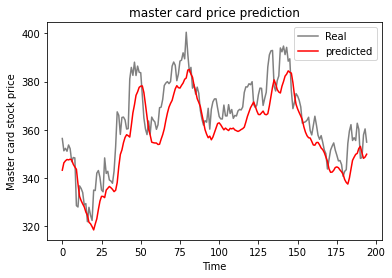

In [79]:
plt.plot(data.loc["2021":,"High"].values,color="gray",label="Real")# test
plt.plot(predicted_stock_price_actual,color="red",label="predicted")
plt.title("master card price prediction")
plt.xlabel("Time")
plt.ylabel("Master card stock price")
plt.legend()
plt.show()

In [81]:
np.sqrt(mean_squared_error(data.loc["2021":,"High"].values,predicted_stock_price_actual))

9.783248396083202